In [41]:
# Install necessary packages (if not installed)
# !pip install pandas numpy matplotlib seaborn scikit-learn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [43]:

df = pd.read_csv("Mall_customers.csv")  

# Display the first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [51]:
# Check data types and missing values
print(df.info())

# Check summary statistics
print(df.describe())

# Check missing values
print(df.isnull().sum())

# Check unique values in categorical columns
print(df['Gender'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

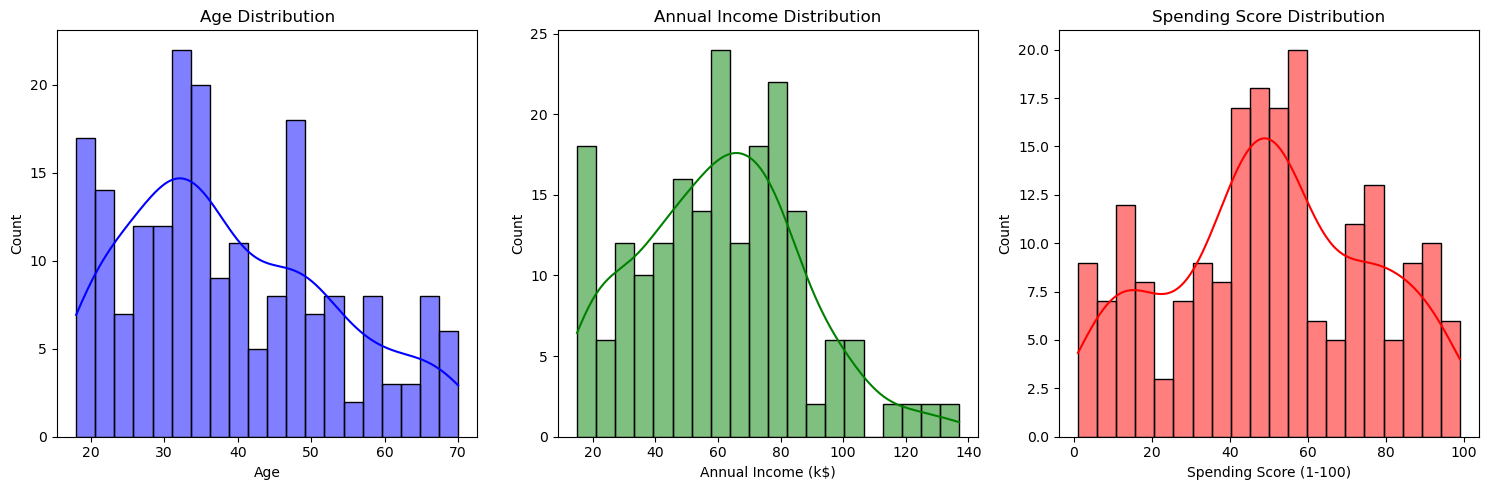

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Age Distribution")

sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title("Annual Income Distribution")

sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, ax=axes[2], color='red')
axes[2].set_title("Spending Score Distribution")

plt.tight_layout()
plt.show()


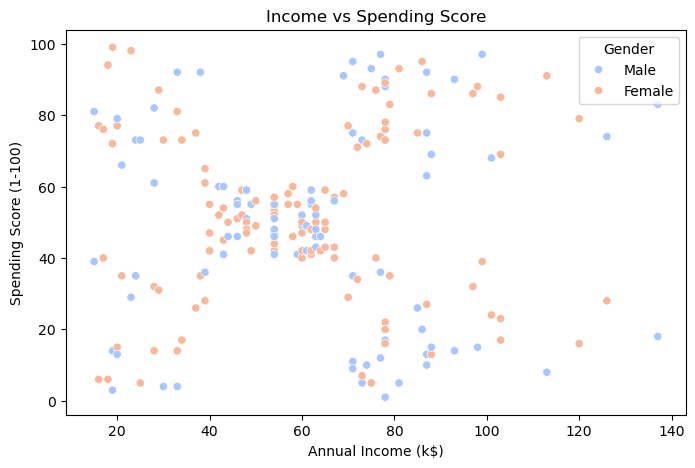

In [55]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Gender'], palette="coolwarm")
plt.title("Income vs Spending Score")
plt.show()


C:\Users\shoaib\AppData\Local\Temp\ipykernel_37104\1937847975.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Gender'], palette="Set2")


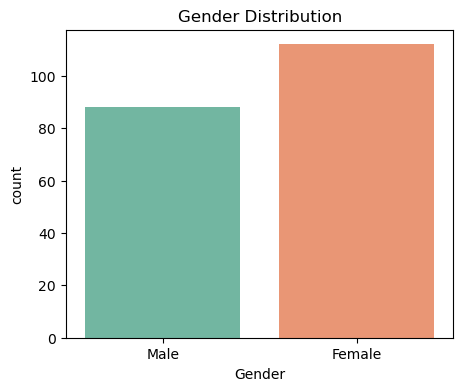

In [57]:
plt.figure(figsize=(5,4))
sns.countplot(x=df['Gender'], palette="Set2")
plt.title("Gender Distribution")
plt.show()


C:\Users\shoaib\AppData\Local\Temp\ipykernel_37104\2439308192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Gender'], y=df['Annual Income (k$)'], ax=axes[0], palette='Set3')
C:\Users\shoaib\AppData\Local\Temp\ipykernel_37104\2439308192.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Gender'], y=df['Spending Score (1-100)'], ax=axes[1], palette='coolwarm')


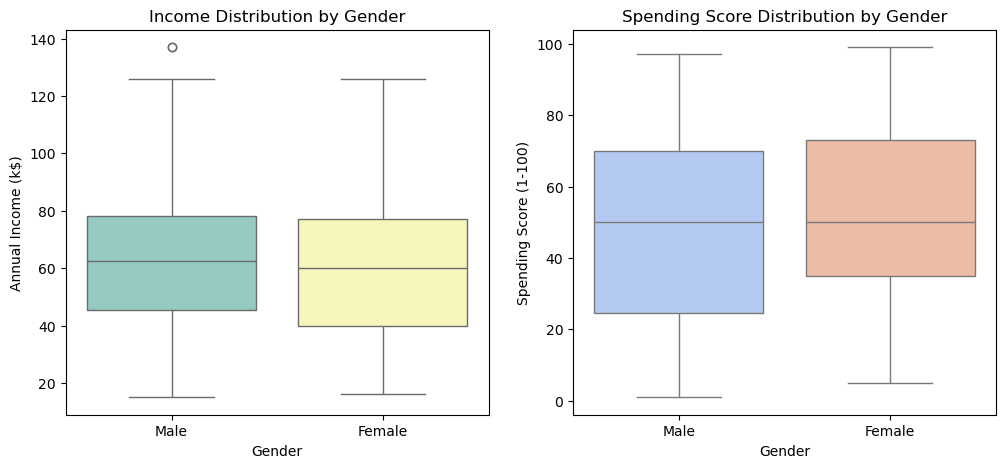

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df['Gender'], y=df['Annual Income (k$)'], ax=axes[0], palette='Set3')
axes[0].set_title("Income Distribution by Gender")

sns.boxplot(x=df['Gender'], y=df['Spending Score (1-100)'], ax=axes[1], palette='coolwarm')
axes[1].set_title("Spending Score Distribution by Gender")

plt.show()


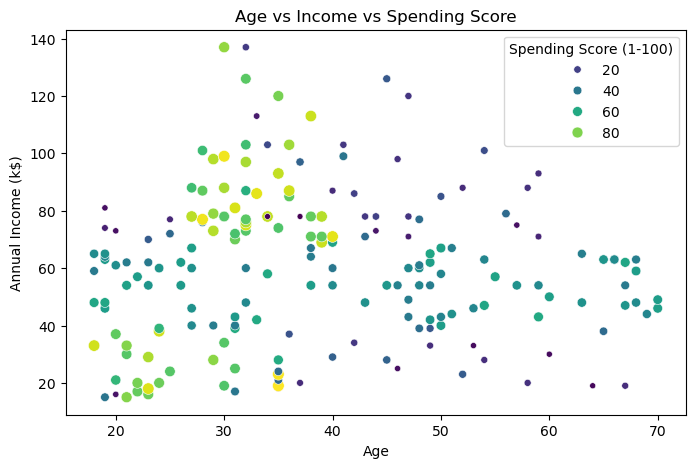

In [61]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], hue=df['Spending Score (1-100)'], size=df['Spending Score (1-100)'], palette="viridis")
plt.title("Age vs Income vs Spending Score")
plt.show()


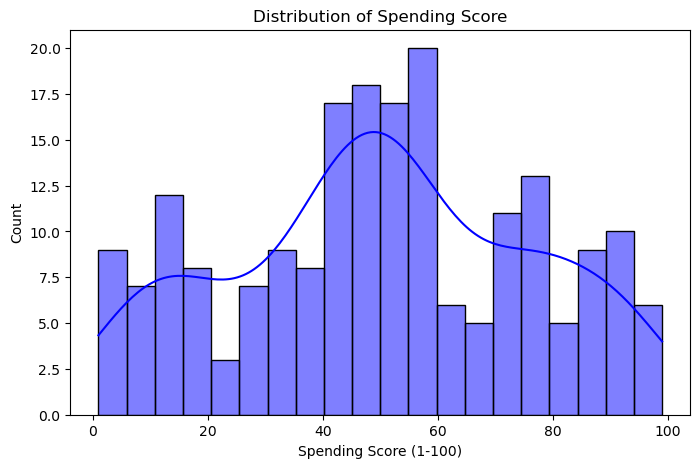

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='blue')
plt.title("Distribution of Spending Score")
plt.show()


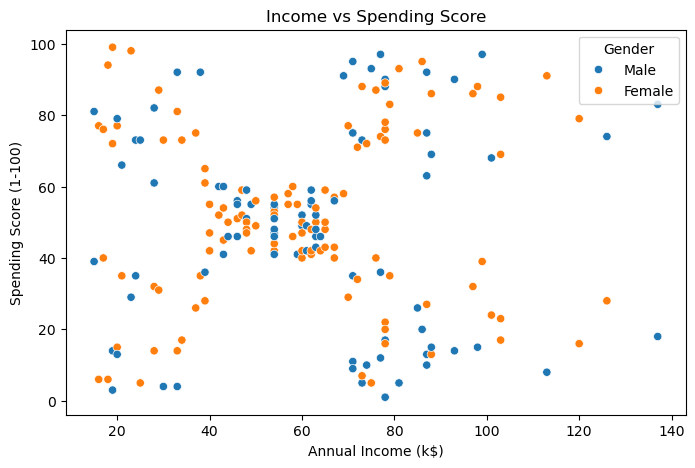

In [49]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Gender'])
plt.title("Income vs Spending Score")
plt.show()



C:\Users\shoaib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shoaib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shoaib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shoaib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

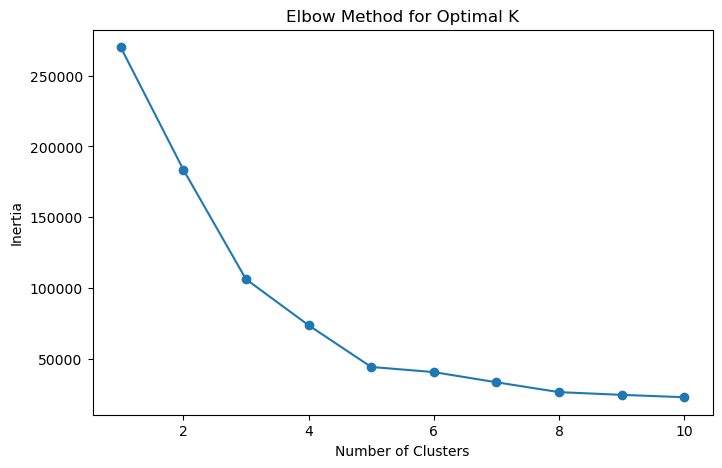

In [65]:
from sklearn.cluster import KMeans

# Select only Income & Spending Score for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Find the best number of clusters using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()



In [67]:
# Train KMeans with optimal clusters (let’s assume K=5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)




C:\Users\shoaib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


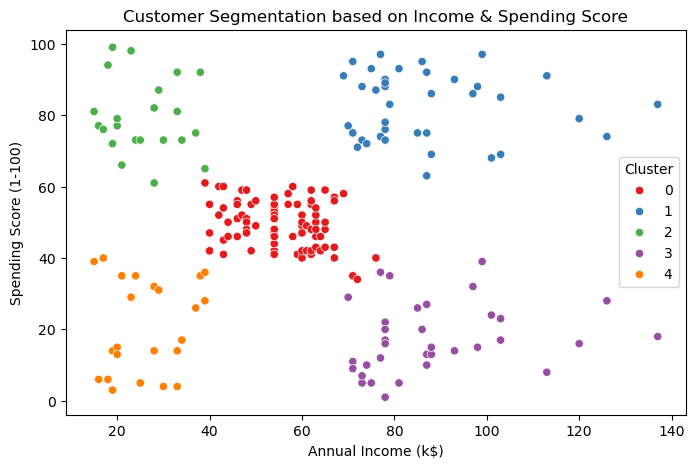

In [69]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='Set1')
plt.title("Customer Segmentation based on Income & Spending Score")
plt.show()


C:\Users\shoaib\AppData\Local\Temp\ipykernel_37104\2304695521.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Cluster'], palette='viridis')


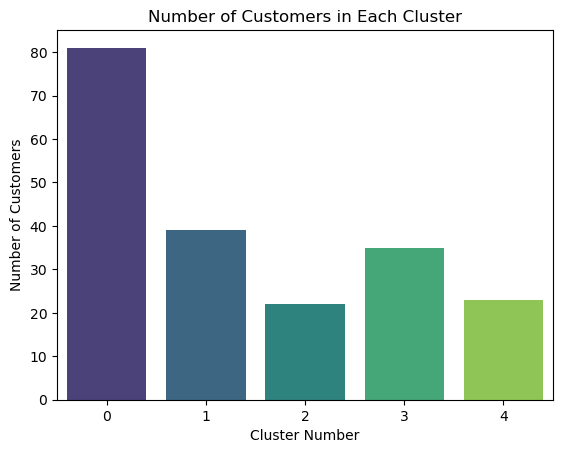

In [71]:
sns.countplot(x=df['Cluster'], palette='viridis')
plt.xlabel("Cluster Number")
plt.ylabel("Number of Customers")
plt.title("Number of Customers in Each Cluster")
plt.show()


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepare dataset for ML model
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = df['Cluster']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")



Model Accuracy: 0.95
